# USING LSTM AND NLP FOR SENTIMENT ANALYSIS

In [1]:
import pandas as pd
import warnings
warnings.filterwarnings("ignore")

## IMPORTING AND CLEANING DATA

In [2]:
df = pd.read_excel("Iphone11Reviews.xlsx")

In [3]:
df.head()

,Unnamed: 0,Name,Review Title,Rating,Date Reviewed,Content,Link
0,0,Neha,Do not buy iphone or expensive product from Am...,1,Reviewed in India on 10 July 2020,Please do not buy expensive product like iph...,/gp/customer-reviews/R2175DKWOQ16BI/ref=cm_cr_...
1,1,Krusshna,Don’t buy it from this seller,1,Reviewed in India on 13 November 2019,Bought the mobile from appario retail ltd. M...,/gp/customer-reviews/R2P0NP0OWNJQFU/ref=cm_cr_...
2,2,shanu Kumar,Solid premium phone from Apple,5,Reviewed in India on 30 September 2019,Awesome Phone. Nice upgrade from iPhone 6s t...,/gp/customer-reviews/R2XPHII12D9O7Q/ref=cm_cr_...
3,3,Amazon Customer,Worst Experience Ever.!,1,Reviewed in India on 14 October 2019,My Phone is Producing Too Much Heat Even Did...,/gp/customer-reviews/R24K8G1ABRUZHM/ref=cm_cr_...
4,4,Sunny Kumar,First Time iPhone User Review :-),5,Reviewed in India on 29 September 2019,The iPhone design is good and the camera qua...,/gp/customer-reviews/R51EDHN250S9U/ref=cm_cr_a...


In [4]:
df.drop("Unnamed: 0",axis=1,inplace=True)

In [5]:
df.dropna(inplace=True)

In [6]:
df.reset_index(inplace=True)
df.drop("index",axis=1,inplace=True)

In [7]:
new = df["Date Reviewed"].str.split(" ",expand = True)

In [8]:
new

,0,1,2,3,4,5,6
0,Reviewed,in,India,on,10,July,2020
1,Reviewed,in,India,on,13,November,2019
2,Reviewed,in,India,on,30,September,2019
3,Reviewed,in,India,on,14,October,2019
4,Reviewed,in,India,on,29,September,2019
...,...,...,...,...,...,...,...
4989,Reviewed,in,India,on,25,July,2021
4990,Reviewed,in,India,on,20,October,2020
4991,Reviewed,in,India,on,8,November,2020
4992,Reviewed,in,India,on,30,July,2021


In [9]:
df["Day"] = new[4]
df["Month"] = new[5]
df["Year"] = new[6]

In [10]:
df

,Name,Review Title,Rating,Date Reviewed,Content,Link,Day,Month,Year
0,Neha,Do not buy iphone or expensive product from Am...,1,Reviewed in India on 10 July 2020,Please do not buy expensive product like iph...,/gp/customer-reviews/R2175DKWOQ16BI/ref=cm_cr_...,10,July,2020
1,Krusshna,Don’t buy it from this seller,1,Reviewed in India on 13 November 2019,Bought the mobile from appario retail ltd. M...,/gp/customer-reviews/R2P0NP0OWNJQFU/ref=cm_cr_...,13,November,2019
2,shanu Kumar,Solid premium phone from Apple,5,Reviewed in India on 30 September 2019,Awesome Phone. Nice upgrade from iPhone 6s t...,/gp/customer-reviews/R2XPHII12D9O7Q/ref=cm_cr_...,30,September,2019
3,Amazon Customer,Worst Experience Ever.!,1,Reviewed in India on 14 October 2019,My Phone is Producing Too Much Heat Even Did...,/gp/customer-reviews/R24K8G1ABRUZHM/ref=cm_cr_...,14,October,2019
4,Sunny Kumar,First Time iPhone User Review :-),5,Reviewed in India on 29 September 2019,The iPhone design is good and the camera qua...,/gp/customer-reviews/R51EDHN250S9U/ref=cm_cr_a...,29,September,2019
...,...,...,...,...,...,...,...,...,...
4989,SHASHI KUMAR YADAV,Ok,4,Reviewed in India on 25 July 2021,Ok,/gp/customer-reviews/R1PE9WV8H9PCBJ/ref=cm_cr_...,25,July,2021
4990,Vanshu gupta,Speaker issue,1,Reviewed in India on 20 October 2020,Speaker is not working properly...,/gp/customer-reviews/R3AHBJ0GCBYOYZ/ref=cm_cr_...,20,October,2020
4991,Asna Khan,Beautiful phone great camera and quality,5,Reviewed in India on 8 November 2020,Beautiful phone great camera and very handy,/gp/customer-reviews/R23U6GY53DSMFX/ref=cm_cr_...,8,November,2020
4992,Satish kaple,Highly Recommend from Amazon shopping,5,Reviewed in India on 30 July 2021,As usual,/gp/customer-reviews/R3GHEYM6ICT4R1/ref=cm_cr_...,30,July,2021


In [11]:
df["Review"] = df["Review Title"] + df["Content"]

In [12]:
df.drop(columns=["Review Title","Content","Link","Date Reviewed"],inplace=True)

In [13]:
sentiment = []

for i in range(len(df)):
    if df.loc[i,"Rating"] == 3:
        sentiment.append("Neutral")
    elif df.loc[i,"Rating"]==1 or df.loc[i,"Rating"]==2:
        sentiment.append("Negative")
    else:
        sentiment.append("Positive")

In [14]:
df["Sentiment"] = sentiment

In [15]:
df

,Name,Rating,Day,Month,Year,Review,Sentiment
0,Neha,1,10,July,2020,Do not buy iphone or expensive product from Am...,Negative
1,Krusshna,1,13,November,2019,Don’t buy it from this seller Bought the mobi...,Negative
2,shanu Kumar,5,30,September,2019,Solid premium phone from Apple Awesome Phone....,Positive
3,Amazon Customer,1,14,October,2019,Worst Experience Ever.! My Phone is Producing...,Negative
4,Sunny Kumar,5,29,September,2019,First Time iPhone User Review :-) The iPhone ...,Positive
...,...,...,...,...,...,...,...
4989,SHASHI KUMAR YADAV,4,25,July,2021,Ok Ok,Positive
4990,Vanshu gupta,1,20,October,2020,Speaker issue Speaker is not working properly...,Negative
4991,Asna Khan,5,8,November,2020,Beautiful phone great camera and quality Beau...,Positive
4992,Satish kaple,5,30,July,2021,Highly Recommend from Amazon shopping As usual,Positive


In [16]:
import matplotlib.pyplot as plt
import seaborn as sns

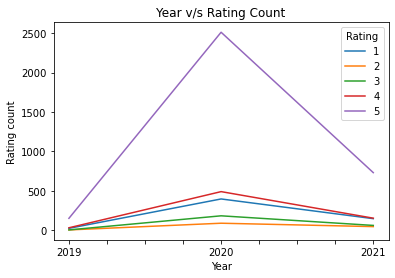

In [17]:
df.groupby(['Year','Rating'])['Rating'].count().unstack().plot(legend=True)
plt.title('Year v/s Rating Count')
plt.xlabel('Year')
plt.ylabel('Rating count')
plt.show()

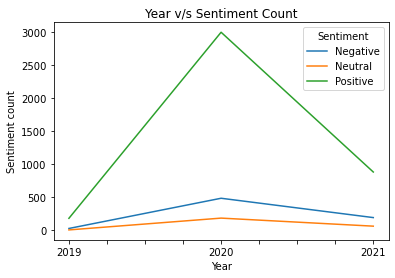

In [18]:
df.groupby(['Year','Sentiment'])['Sentiment'].count().unstack().plot(legend=True)
plt.title('Year v/s Sentiment Count')
plt.xlabel('Year')
plt.ylabel('Sentiment count')
plt.show()

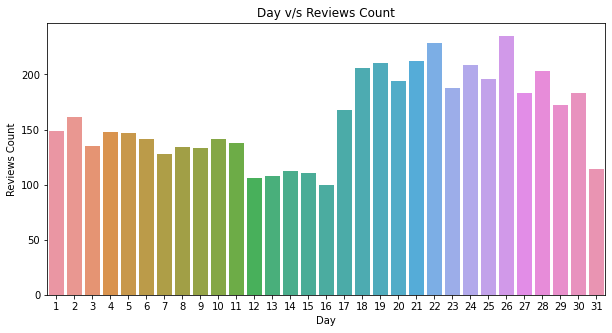

In [19]:

day = pd.DataFrame(df.groupby('Day')['Review'].count()).reset_index()
day['Day'] = day['Day'].astype('int64')
day.sort_values(by=['Day'])

plt.figure(figsize=(10,5))
sns.barplot(x="Day", y="Review", data=day)
plt.title('Day v/s Reviews Count')
plt.xlabel('Day')
plt.ylabel('Reviews Count')
plt.show()

In [20]:
import nltk
from nltk.corpus import stopwords
from textblob import Word
from sklearn.preprocessing import LabelEncoder
from collections import Counter
import wordcloud
from sklearn.metrics import classification_report, confusion_matrix, accuracy_score
from keras.models import Sequential
from keras.preprocessing.text import Tokenizer
from keras.preprocessing.sequence import pad_sequences
from keras.layers import Dense, Embedding, LSTM, SpatialDropout1D
from sklearn.model_selection import train_test_split

### CONVERTING ALL THE UPPERCASES INTO LOWERCASES

In [21]:
df["Review"] = df["Review"].apply(lambda x: ' '.join(x.lower() for x in x.split()))
df

,Name,Rating,Day,Month,Year,Review,Sentiment
0,Neha,1,10,July,2020,do not buy iphone or expensive product from am...,Negative
1,Krusshna,1,13,November,2019,don’t buy it from this seller bought the mobil...,Negative
2,shanu Kumar,5,30,September,2019,solid premium phone from apple awesome phone. ...,Positive
3,Amazon Customer,1,14,October,2019,worst experience ever.! my phone is producing ...,Negative
4,Sunny Kumar,5,29,September,2019,first time iphone user review :-) the iphone d...,Positive
...,...,...,...,...,...,...,...
4989,SHASHI KUMAR YADAV,4,25,July,2021,ok ok,Positive
4990,Vanshu gupta,1,20,October,2020,speaker issue speaker is not working properly...,Negative
4991,Asna Khan,5,8,November,2020,beautiful phone great camera and quality beaut...,Positive
4992,Satish kaple,5,30,July,2021,highly recommend from amazon shopping as usual,Positive


### REMOVING SPECIAL CHARACTERS

In [22]:
special_char = '@_!#$%^&*()<>?/\|}{~:;[]'
for i in special_char:
    df["Review"] = df["Review"].str.replace(i,'') #removing special characters.
df

,Name,Rating,Day,Month,Year,Review,Sentiment
0,Neha,1,10,July,2020,do not buy iphone or expensive product from am...,Negative
1,Krusshna,1,13,November,2019,don’t buy it from this seller bought the mobil...,Negative
2,shanu Kumar,5,30,September,2019,solid premium phone from apple awesome phone. ...,Positive
3,Amazon Customer,1,14,October,2019,worst experience ever. my phone is producing t...,Negative
4,Sunny Kumar,5,29,September,2019,first time iphone user review - the iphone des...,Positive
...,...,...,...,...,...,...,...
4989,SHASHI KUMAR YADAV,4,25,July,2021,ok ok,Positive
4990,Vanshu gupta,1,20,October,2020,speaker issue speaker is not working properly...,Negative
4991,Asna Khan,5,8,November,2020,beautiful phone great camera and quality beaut...,Positive
4992,Satish kaple,5,30,July,2021,highly recommend from amazon shopping as usual,Positive


### REMOVING DIGITS

In [23]:
df["Review"] = df["Review"].str.replace('d','') #removing digits
df

,Name,Rating,Day,Month,Year,Review,Sentiment
0,Neha,1,10,July,2020,o not buy iphone or expensive prouct from amaz...,Negative
1,Krusshna,1,13,November,2019,on’t buy it from this seller bought the mobile...,Negative
2,shanu Kumar,5,30,September,2019,soli premium phone from apple awesome phone. n...,Positive
3,Amazon Customer,1,14,October,2019,worst experience ever. my phone is proucing to...,Negative
4,Sunny Kumar,5,29,September,2019,first time iphone user review - the iphone esi...,Positive
...,...,...,...,...,...,...,...
4989,SHASHI KUMAR YADAV,4,25,July,2021,ok ok,Positive
4990,Vanshu gupta,1,20,October,2020,speaker issue speaker is not working properly...,Negative
4991,Asna Khan,5,8,November,2020,beautiful phone great camera an quality beauti...,Positive
4992,Satish kaple,5,30,July,2021,highly recommen from amazon shopping as usual,Positive


### REMOVING STOPWORDS

In [24]:
df["Review"] = df["Review"].apply(lambda x: ' '.join(x for x in x.split() if x not in stopwords.words("english"))) 
df

,Name,Rating,Day,Month,Year,Review,Sentiment
0,Neha,1,10,July,2020,buy iphone expensive prouct amazom please buy ...,Negative
1,Krusshna,1,13,November,2019,on’t buy seller bought mobile appario retail l...,Negative
2,shanu Kumar,5,30,September,2019,soli premium phone apple awesome phone. nice u...,Positive
3,Amazon Customer,1,14,October,2019,worst experience ever. phone proucing much hea...,Negative
4,Sunny Kumar,5,29,September,2019,first time iphone user review - iphone esign g...,Positive
...,...,...,...,...,...,...,...
4989,SHASHI KUMAR YADAV,4,25,July,2021,ok ok,Positive
4990,Vanshu gupta,1,20,October,2020,speaker issue speaker working properly...,Negative
4991,Asna Khan,5,8,November,2020,beautiful phone great camera quality beautiful...,Positive
4992,Satish kaple,5,30,July,2021,highly recommen amazon shopping usual,Positive


### LEMMATIZATION OF DATA

In [25]:
df["Review"] = df["Review"].apply(lambda x: ' '.join([Word(x).lemmatize() for x in x.split()])) #lemmatization

In [26]:
df

,Name,Rating,Day,Month,Year,Review,Sentiment
0,Neha,1,10,July,2020,buy iphone expensive prouct amazom please buy ...,Negative
1,Krusshna,1,13,November,2019,on’t buy seller bought mobile appario retail l...,Negative
2,shanu Kumar,5,30,September,2019,solo premium phone apple awesome phone. nice u...,Positive
3,Amazon Customer,1,14,October,2019,worst experience ever. phone proucing much hea...,Negative
4,Sunny Kumar,5,29,September,2019,first time iphone user review - iphone esign g...,Positive
...,...,...,...,...,...,...,...
4989,SHASHI KUMAR YADAV,4,25,July,2021,ok ok,Positive
4990,Vanshu gupta,1,20,October,2020,speaker issue speaker working properly...,Negative
4991,Asna Khan,5,8,November,2020,beautiful phone great camera quality beautiful...,Positive
4992,Satish kaple,5,30,July,2021,highly recommen amazon shopping usual,Positive


## UNDERSTANDING DATA AND APPLYING LSTM MODEL

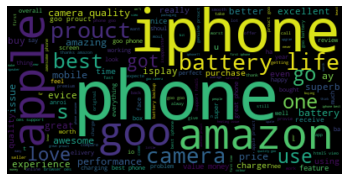

In [28]:
words_common = ''
for i in df1["Review"]:
    i = str(i)
    tokens = i.split()
    words_common+=" ".join(tokens)+" "
    
wordcloud = wordcloud.WordCloud().generate(words_common)
plt.imshow(wordcloud, interpolation="bilinear")
plt.axis("off")
plt.show()

### TOKENIZING AND LABELING THE DATA

In [29]:
lb = LabelEncoder()
df["Sentiment"] = lb.fit_transform(df["Sentiment"])

In [30]:
tokenizer = Tokenizer(num_words=500, split=' ')
tokenizer.fit_on_texts(df["Review"].values)
x = tokenizer.texts_to_sequences(df["Review"].values)
x = pad_sequences(x)

### APPLYING LSTM MODEL

In [32]:
model = Sequential()
model.add(Embedding(500,120,input_length=x.shape[1]))
model.add(SpatialDropout1D(0.4))
model.add(LSTM(176, dropout=0.2, recurrent_dropout=0.2))
model.add(Dense(1,activation="softmax"))
model.compile(loss="categorical_crossentropy", optimizer="adam", metrics=["accuracy"])

In [33]:
print(model.summary())

Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
embedding (Embedding)        (None, 303, 120)          60000     
_________________________________________________________________
spatial_dropout1d (SpatialDr (None, 303, 120)          0         
_________________________________________________________________
lstm (LSTM)                  (None, 176)               209088    
_________________________________________________________________
dense (Dense)                (None, 1)                 177       
Total params: 269,265
Trainable params: 269,265
Non-trainable params: 0
_________________________________________________________________
None


In [34]:
from sklearn import preprocessing
y = df[["Sentiment"]]
y = preprocessing.normalize(y)
x = preprocessing.normalize(x)

In [35]:
x_train, x_test, y_train, y_test = train_test_split(x,y, test_size = 0.3, random_state = 42)

In [36]:
model.fit(x_train, y_train, epochs=5, batch_size = 128, verbose="auto")

Epoch 1/5
Epoch 2/5
Epoch 3/5
Epoch 4/5
Epoch 5/5


In [37]:
model.evaluate(x_test,y_test)

47/47 [==============================] - 19s 400ms/step - loss: 0.0000e+00 - accuracy: 0.8552


[0.0, 0.855236828327179]